## 1. Постановка задачи


<center> <img src=https://storage.googleapis.com/kaggle-competitions/kaggle/3333/media/taxi_meter.png align="right" width="300"/> </center>
    

Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке. 

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее. 

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф. 
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


## 1. Statement of the problem

You'll be solving a real-world machine learning problem aimed at automating business processes. We'll build a model that will predict the total duration of a taxi ride in New York City.

Imagine you're ordering a taxi from one point in New York City to another, and the destination doesn't necessarily have to be within the city limits. How much will you pay? Taxi fares in the US are calculated based on a flat rate plus a tiered fare, which depends on the time and distance. Rates vary by city.

In turn, travel time depends on many factors such as where you are traveling from and to, what time of day you are traveling, weather conditions, and so on.

Thus, if we develop an algorithm capable of determining trip duration, we can predict its cost in the most trivial way, for example, by simply multiplying the cost by a given fare.
Taxi services store vast amounts of trip information, including details such as the destination, starting point, trip date, and duration. This data can be used to automatically predict trip duration using artificial intelligence.

**Business problem:** determine the characteristics and use them to predict the duration of a taxi trip.

**The technical challenge for you as a Data Science specialist:** Build a machine learning model that, based on the customer's characteristics, will predict a numerical feature—taxi travel time. That is, solve a regression problem.

**The main objectives of the project:**
1. Create a dataset based on multiple sources of information
2. Design new features using Feature Engineering and identify the most significant ones when building a model
3. Explore the provided data and identify patterns
4. Build several models and select the best one based on a given metric
5. Design a travel time prediction process for the new data

Upload your solution to the Kaggle platform, thereby participating in a real data science competition.
During the project, you'll practice working with multiple data sources, feature generation, exploratory data analysis and visualization, feature selection, and, of course, building machine learning models!


## 2. Знакомство с данными, базовый анализ и расширение данных
## 2. Getting to Know the Data, Basic Analysis, and Data Extension

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет. 

Let's begin our research by familiarizing ourselves with the provided data. We'll also load additional data sources and expand our initial dataset.


Заранее импортируем модули, которые нам понадобятся для решения задачи:

Let's import the modules we'll need to solve the problem in advance:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

Прочитаем наш файл с исходными данными:

Let's read our file with the original data:

In [2]:
taxi_data = pd.read_csv("train.csv")
print('Train data shape: {}'.format(taxi_data.shape))
taxi_data.head()

Train data shape: (1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок. 

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах

Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу. 


So, we have data on almost 1.5 million trips and 11 characteristics that describe each trip.

We've tentatively divided the features into several groups. We'll pay separate attention to each group below.

**Client and Taxi Company Data:**
* id - unique trip identifier
* vendor_id - unique identifier of the vendor (taxi company) associated with the trip record

**Time characteristics:**
* pickup_datetime - date and time when the trip meter was turned on
* dropoff_datetime - date and time when the meter was turned off

**Geographical information:**
* pickup_longitude - the longitude at which the counter was enabled
* pickup_latitude - the latitude at which the counter was enabled
* dropoff_longitude - the longitude at which the counter was disabled
* dropoff_latitude - the latitude at which the counter was disabled

**Other attributes:**
* passenger_count - the number of passengers in the vehicle (the value entered by the driver)
* store_and_fwd_flag - a flag indicating whether the trip record was saved in the vehicle's memory before being sent to the supplier. Y - store and forward, N - do not store or forward the trip.

**Target feature:**
* trip_duration - trip duration in seconds

To begin, we will conduct a basic analysis of how ready the data is for further pre-processing and analysis.

### Задание 2.1
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S'). 

Определите временные рамки (без учета времени), за которые представлены данные.

### Task 2.1
First, let's look at the timeframe in which we're working with the data.

Convert the pickup_datetime attribute to a datetime data type with the year-month-day hour:minute:second format (in the pd.to_datetime() function, the format='%Y-%m-%d %H:%M:%S' parameter).

Determine the time frame (excluding time) for which the data is presented.

In [3]:
# ваш код здесь
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
display(taxi_data['pickup_datetime'])

0         2016-03-14 17:24:55
1         2016-06-12 00:43:35
2         2016-01-19 11:35:24
3         2016-04-06 19:32:31
4         2016-03-26 13:30:55
                  ...        
1458639   2016-04-08 13:31:04
1458640   2016-01-10 07:35:15
1458641   2016-04-22 06:57:41
1458642   2016-01-05 15:56:26
1458643   2016-04-05 14:44:25
Name: pickup_datetime, Length: 1458644, dtype: datetime64[ns]

In [4]:
taxi_data['pickup_datetime'].sort_values().head(5)

96469    2016-01-01 00:00:17
223872   2016-01-01 00:00:53
713067   2016-01-01 00:01:01
652463   2016-01-01 00:01:14
722901   2016-01-01 00:01:20
Name: pickup_datetime, dtype: datetime64[ns]

In [5]:
taxi_data['pickup_datetime'].sort_values().tail(5)

853710    2016-06-30 23:58:52
419031    2016-06-30 23:59:09
1008720   2016-06-30 23:59:10
405743    2016-06-30 23:59:37
500524    2016-06-30 23:59:39
Name: pickup_datetime, dtype: datetime64[ns]

### Задание 2.2
Посмотрим на пропуски. 
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

### Task 2.2
Let's look at the missing values.
How many missing values are there in the data (total for all columns in the table)?

In [6]:
# ваш код здесь
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  object        
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 122.4+ MB


### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков. 

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


### Task 2.3
Let's look at the statistical characteristics of some features.

a) How many unique taxi companies are there in the data?

b) What is the maximum number of passengers?

c) What is the average and median trip duration? Give your answer in seconds and round to the nearest whole number.

d) What is the minimum and maximum trip time (in seconds)?

In [7]:
# ваш код здесь
taxi_data['vendor_id'].nunique()

2

In [8]:
taxi_data['passenger_count'].value_counts()

passenger_count
1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: count, dtype: int64

In [9]:
taxi_data['trip_duration'].mean()

959.4922729603659

In [10]:
taxi_data['trip_duration'].median()

662.0

In [11]:
taxi_data['trip_duration'].max()

3526282

In [12]:
taxi_data['trip_duration'].min()

1

Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками. 


We will expand the original data set using both external sources and manipulations of the features present in the data.

### Задание 2.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - порядковый номер дня недели (число), в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

### Task 2.4
Implement the add_datetime_features() function, which takes a table of trip data (DataFrame) as input and returns the same table with three additional columns:
* pickup_date - the date the meter was turned on - the start of the trip (without time);
* pickup_hour - the hour of the day the meter was turned on;
* pickup_day_of_week - the day of the week (number) on which the meter was turned on.

a) How many trips were made on Saturday?

b) How many trips are made on average per day? Round your answer to the nearest whole number.

In [13]:
# ваш код здесь
def add_datetime_features(data):
    data['pickup_date']=data['pickup_datetime'].dt.date
    data['pickup_hour']=data['pickup_datetime'].dt.hour
    data['pickup_day_of_week']=data['pickup_datetime'].dt.dayofweek
    return data

In [14]:
add_datetime_features(taxi_data)
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19,2
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13,5


In [15]:
taxi_data['pickup_date'] = pd.to_datetime(taxi_data['pickup_date'])

In [16]:
taxi_data['pickup_day_of_week'].value_counts()

pickup_day_of_week
4    223533
5    220868
3    218574
2    210136
1    202749
6    195366
0    187418
Name: count, dtype: int64

In [17]:
taxi_data['pickup_date'].value_counts().mean()

8014.527472527472

### Задание 2.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы: 
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет). 

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.


### Task 2.5
Implement the add_holiday_features() function, which takes two tables as input:
* a table with trip data;
* a table with holiday data;

and returns the updated trip data table with the added pickup_holiday column—a binary indicator of whether the trip started on a holiday (1 - yes, 0 - no).

What is the median taxi ride duration on holidays? Give your answer in seconds, rounded to the nearest whole number.

In [18]:
holiday_data = pd.read_csv('holiday_data.csv', sep=';')
holiday_data.head()
# ваш код здесь

,day,date,holiday
0,Friday,2016-01-01,New Years Day
1,Monday,2016-01-18,Martin Luther King Jr. Day
2,Friday,2016-02-12,Lincoln's Birthday
3,Monday,2016-02-15,Presidents' Day
4,Sunday,2016-05-08,Mother's Day


In [19]:
def add_holiday_features(data, data_holiday):
    # приводим даты праздников к datetime
    # convert holiday dates to datetime
    data_holiday['date'] = pd.to_datetime(data_holiday['date'])

    # создаём бинарный признак: 1 — праздник, 0 — нет
    # create a binary attribute: 1 - holiday, 0 - no
    data['pickup_holiday'] = data['pickup_date'].isin(data_holiday['date']).astype(int)

    return data    

In [20]:
taxi_data = add_holiday_features(taxi_data, holiday_data)
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week,pickup_holiday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,6,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11,1,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19,2,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13,5,0


In [21]:
taxi_data.loc[taxi_data['pickup_holiday'] == 1, 'trip_duration'].median()

585.0

### Задание 2.6
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM? 

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника. 

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

### Task 2.6
Implement the add_osrm_features() function that takes two tables as input:
* a table with trip data;
* a table with data from OSRM;

and returns an updated table with trip data with three added columns:
* total_distance;
* total_travel_time;
* number_of_steps.

a) What is the difference (in seconds) between the median trip duration in the data and the median trip duration obtained from OSRM?

As a result of merging the tables, you should have had gaps in the columns with information from the OSRM API. This is because data could not be downloaded from the web source for some trips.

b) How many gaps are there in the columns with information from the OSRM API after merging the tables?

In [22]:
osrm_data = pd.read_csv('osrm_data_train.csv')
osrm_data.head()
# ваш код здесь

,id,starting_street,end_street,total_distance,total_travel_time,number_of_steps,street_for_each_step,distance_per_step,travel_time_per_step,step_maneuvers,step_direction,step_location_list
0,id2875421,Columbus Circle,East 65th Street,2009.1,164.9,5,Columbus Circle|Central Park West|65th Street ...,0|576.4|885.6|547.1|0,0|61.1|60.1|43.7|0,depart|rotary|turn|new name|arrive,left|straight|right|straight|arrive,"-73.982316,40.767869|-73.981997,40.767688|-73...."
1,id2377394,2nd Avenue,Washington Square West,2513.2,332.0,6,2nd Avenue|East 13th Street|5th Avenue|Washing...,877.3|836.5|496.1|164.2|139.1|0,111.7|109|69.9|25.8|15.6|0,depart|turn|turn|end of road|continue|arrive,none|right|left|right|left|arrive,"-73.980429,40.73857|-73.985444,40.731658|-73.9..."
2,id3504673,Greenwich Street,Broadway,1779.4,235.8,4,Greenwich Street|Park Place|Broadway|Broadway,644.2|379.9|755.3|0,80.5|50.8|104.5|0,depart|turn|end of road|arrive,left|left|right|arrive,"-74.010145,40.719982|-74.011527,40.714294|-74...."
3,id2181028,Broadway,West 81st Street,1614.9,140.1,5,Broadway|West 86th Street|Columbus Avenue|West...,617|427.4|412.2|158.3|0,56|36|37.8|10.3|0,depart|turn|turn|turn|arrive,right|left|right|left|arrive,"-73.972998,40.793187|-73.976607,40.788361|-73...."
4,id0801584,Lexington Avenue,West 31st Street,1393.5,189.4,5,Lexington Avenue|East 27th Street|Madison Aven...,18.9|311.9|313.3|749.4|0,6.3|42.9|48.4|91.8|0,depart|turn|turn|turn|arrive,right|right|right|left|arrive,"-73.982805,40.742173|-73.982914,40.742024|-73...."


In [23]:
osrm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458643 entries, 0 to 1458642
Data columns (total 12 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1458643 non-null  object 
 1   starting_street       1458643 non-null  object 
 2   end_street            1458643 non-null  object 
 3   total_distance        1458643 non-null  float64
 4   total_travel_time     1458643 non-null  float64
 5   number_of_steps       1458643 non-null  int64  
 6   street_for_each_step  1458643 non-null  object 
 7   distance_per_step     1458643 non-null  object 
 8   travel_time_per_step  1458643 non-null  object 
 9   step_maneuvers        1458643 non-null  object 
 10  step_direction        1458643 non-null  object 
 11  step_location_list    1458643 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 133.5+ MB


In [24]:
def add_osrm_features(data, data_osrm):
    # выделяем необходимые нам стоблцы из data_osrm
    # we select the columns we need from data_osrm
    data_osrm = data_osrm[['id', 'total_distance', 'total_travel_time', 'number_of_steps']]

    # объединяем таблицы по id
    # merge tables by id
    data = data.merge(data_osrm, on = 'id', how = 'left')

    return data    

In [25]:
taxi_data = add_osrm_features(taxi_data, osrm_data)
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week,pickup_holiday,total_distance,total_travel_time,number_of_steps
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17,0,0,2009.1,164.9,5.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,6,0,2513.2,332.0,6.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11,1,0,11060.8,767.6,16.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19,2,0,1779.4,235.8,4.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13,5,0,1614.9,140.1,5.0


In [26]:
difference = taxi_data['trip_duration'].median() - taxi_data['total_travel_time'].median()
print(difference)

372.5


In [27]:
taxi_data[['total_distance', 'total_travel_time', 'number_of_steps']].isnull().sum()

total_distance       1
total_travel_time    1
number_of_steps      1
dtype: int64

In [28]:
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус земли в километрах
    EARTH_RADIUS = 6371 
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def get_angle_direction(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

### Задание 2.7.
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.


### Task 2.7.
Implement the add_geographical_features() function, which takes a table of trip data as input and returns an updated table with two columns added:
* haversine_distance - the Haversine distance between the point where the meter was turned on and the point where the meter was turned off;
* direction - the direction of travel from the point where the meter was turned on to the point where the meter was turned off.

What is the median Haversine distance of trips (in kilometers)? Round your answer to hundredths.

In [29]:
# ваш код здесь
def add_geographical_features(data):
    data['haversine_distance'] = get_haversine_distance(data['pickup_latitude'], data['pickup_longitude'], data['dropoff_latitude'], data['dropoff_longitude'])
    data['direction'] = get_angle_direction(data['pickup_latitude'], data['pickup_longitude'], data['dropoff_latitude'], data['dropoff_longitude'])
    return data

In [30]:
taxi_data = add_geographical_features(taxi_data)
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week,pickup_holiday,total_distance,total_travel_time,number_of_steps,haversine_distance,direction
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17,0,0,2009.1,164.9,5.0,1.498521,99.970196
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,6,0,2513.2,332.0,6.0,1.805507,-117.153768
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11,1,0,11060.8,767.6,16.0,6.385098,-159.680165
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19,2,0,1779.4,235.8,4.0,1.485498,-172.737700
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13,5,0,1614.9,140.1,5.0,1.188588,179.473585


In [31]:
distance = round(taxi_data['haversine_distance'].median(),2)
print(distance)

2.09


### Задание 2.8.
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?


### Task 2.8.
Implement the add_cluster_features() function, which takes a table of trip data and a trained clustering algorithm as input. The function should return an updated table with the added geo_cluster column—the geographic cluster to which the trip belongs.

How many trips are contained in the smallest geographic cluster?

In [32]:
# создаем обучающую выборку из географических координат всех точек
# create a training sample from the geographic coordinates of all points
coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
                    taxi_data[['dropoff_latitude', 'dropoff_longitude']]))
# обучаем алгоритм кластеризации
# training the clustering algorithm
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)

# ваш код здесь

,n_clusters,10
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [33]:
def add_cluster_features(data, kmeans):
    coords = np.hstack((
        data[['pickup_latitude', 'pickup_longitude']],
        data[['dropoff_latitude', 'dropoff_longitude']]
    ))
    
    data['geo_cluster'] = kmeans.predict(coords)
    return data

In [34]:
taxi_data = add_cluster_features(taxi_data, kmeans)
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_date,pickup_hour,pickup_day_of_week,pickup_holiday,total_distance,total_travel_time,number_of_steps,haversine_distance,direction,geo_cluster
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,2016-03-14,17,0,0,2009.1,164.9,5.0,1.498521,99.970196,6
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,2016-06-12,0,6,0,2513.2,332.0,6.0,1.805507,-117.153768,9
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,2016-01-19,11,1,0,11060.8,767.6,16.0,6.385098,-159.680165,9
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,2016-04-06,19,2,0,1779.4,235.8,4.0,1.485498,-172.737700,9
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,2016-03-26,13,5,0,1614.9,140.1,5.0,1.188588,179.473585,6


In [35]:
taxi_data['geo_cluster'].value_counts().min()

2

### Задание 2.9.
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки. 

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.


### Task 2.9.
Implement the add_weather_features() function that accepts two tables as input:
* a table with trip data;
* a table with hourly weather data;

and returns an updated table of trip data with 5 columns added:
* temperature;
* visibility;
* wind speed;
* precip;
* events.

a) How many trips were taken during snowy weather?

The merge should result in records with missing values ​​in the temperature, visibility, wind speed, precip, and events columns. This is because the weather table is missing values ​​for some of the times at which the trip counter was enabled.

b) What percentage of the total number of observations in the trip table are missing values ​​in the weather columns? Give your answer accurate to hundredths of a percent.

In [36]:
weather_data = pd.read_csv('weather_data.csv')
weather_data.head()
# ваш код здесь

,time,temperature,windchill,heat index,humidity,pressure,dew Point,visibility,wind dir,wind speed,gust speed,precip,events,conditions,date,hour
0,2015-12-31 02:00:00,7.8,7.1,NaN,0.89,1017.0,6.1,8.0,NNE,5.6,0.0,0.8,NaN,Overcast,2015-12-31,2
1,2015-12-31 03:00:00,7.2,5.9,NaN,0.90,1016.5,5.6,12.9,Variable,7.4,0.0,0.3,NaN,Overcast,2015-12-31,3
2,2015-12-31 04:00:00,7.2,NaN,NaN,0.90,1016.7,5.6,12.9,Calm,0.0,0.0,0.0,NaN,Overcast,2015-12-31,4
3,2015-12-31 05:00:00,7.2,5.9,NaN,0.86,1015.9,5.0,14.5,NW,7.4,0.0,0.0,NaN,Overcast,2015-12-31,5
4,2015-12-31 06:00:00,7.2,6.4,NaN,0.90,1016.2,5.6,11.3,West,5.6,0.0,0.0,NaN,Overcast,2015-12-31,6


In [37]:
weather_data = weather_data.drop(['time','windchill','heat index','humidity','pressure','dew Point','wind dir','gust speed','conditions'], axis=1)
weather_data.head()

,temperature,visibility,wind speed,precip,events,date,hour
0,7.8,8.0,5.6,0.8,NaN,2015-12-31,2
1,7.2,12.9,7.4,0.3,NaN,2015-12-31,3
2,7.2,12.9,0.0,0.0,NaN,2015-12-31,4
3,7.2,14.5,7.4,0.0,NaN,2015-12-31,5
4,7.2,11.3,5.6,0.0,NaN,2015-12-31,6


In [38]:
def add_weather_features(data, data_weather):
    data_weather['date'] = pd.to_datetime(data_weather['date'])
    # объединяем таблицы по столбцам даты (pickup_date и date) и часа (pickup_hour и hour)
    # merge tables by date columns (pickup date and date) and hour columns (pickup_hour and hour)
    data = data.merge(
        data_weather,
        left_on=['pickup_date', 'pickup_hour'],
        right_on=['date', 'hour'],
        how='left'
    )
    
    data = data.drop(['date', 'hour'], axis=1)
    
    return data

In [39]:
taxi_data = add_weather_features(taxi_data, weather_data)
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,total_travel_time,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,164.9,5.0,1.498521,99.970196,6,4.4,8.0,27.8,0.3,NaN
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,332.0,6.0,1.805507,-117.153768,9,28.9,16.1,7.4,0.0,NaN
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,767.6,16.0,6.385098,-159.680165,9,-6.7,16.1,24.1,0.0,NaN
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,235.8,4.0,1.485498,-172.737700,9,7.2,16.1,25.9,0.0,NaN
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,140.1,5.0,1.188588,179.473585,6,9.4,16.1,9.3,0.0,NaN


In [40]:
taxi_data['events'].value_counts()

events
Rain    58300
Snow    13126
Fog         1
Name: count, dtype: int64

In [41]:
weather_cols = ['temperature', 'visibility', 'wind speed', 'precip', 'events']

missing_percent = (
    taxi_data[weather_cols]
    .isna()
    .all(axis=1)
    .mean()
    * 100
)

round(missing_percent, 2)

0.82

In [42]:
taxi_data[weather_cols].isna().any(axis=1).value_counts(normalize=True) * 100

True     95.103192
False     4.896808
Name: proportion, dtype: float64

In [43]:
cols_null_percent = taxi_data.isnull().mean()*100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

events               95.103192
temperature           0.824876
visibility            0.824876
wind speed            0.824876
precip                0.824876
total_distance        0.000069
total_travel_time     0.000069
number_of_steps       0.000069
dtype: float64

### Задание 2.10.
Реализуйте функцию fill_null_weather_data(), которая принимает на вход которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски. 
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана). 

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам. 

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.


### Task 2.10.
Implement the fill_null_weather_data() function, which accepts a table of trip data as input. The function should fill in missing values ​​in the columns.

Fill the gaps in the weather columns (temperature, visibility, wind speed, and precip) with the median value of temperature, humidity, wind speed, and visibility based on the trip start date. To do this, group the data by the pickup_date column and calculate the median in each group. Then, use a combination of the transform() and fillna() methods to fill in the gaps.

Fill the gaps in the events column with the string 'None', indicating the absence of weather events (snow/rain/fog).

Fill the gaps in the columns containing information from the OSRM API (total_distance, total_travel_time, and number_of_steps) with the median value for the columns.

What is the median in the temperature column after filling in the blanks? Round your answer to the nearest tenth.

In [44]:
# ваш код здесь
def fill_null_weather_data(data):
    weather_cols = ['temperature', 'visibility', 'wind speed', 'precip']

    # заполняем погодные признаки медианой по дате
    # fill weather features with median by date
    for col in weather_cols:
        data[col] = data[col].fillna(
            data.groupby('pickup_date')[col].transform('median')
        )

    # events
    data['events'] = data['events'].fillna('None')

    # OSRM признаки
    # OSRM signs
    osrm_cols = ['total_distance', 'total_travel_time', 'number_of_steps']
    for col in osrm_cols:
        data[col] = data[col].fillna(data[col].median())

    return data

In [45]:
taxi_data = fill_null_weather_data(taxi_data)
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,total_travel_time,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,164.9,5.0,1.498521,99.970196,6,4.4,8.0,27.8,0.3,None
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,332.0,6.0,1.805507,-117.153768,9,28.9,16.1,7.4,0.0,None
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,767.6,16.0,6.385098,-159.680165,9,-6.7,16.1,24.1,0.0,None
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,235.8,4.0,1.485498,-172.737700,9,7.2,16.1,25.9,0.0,None
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,140.1,5.0,1.188588,179.473585,6,9.4,16.1,9.3,0.0,None


In [46]:
taxi_data['temperature'].median()

11.1

В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки. 

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа. 

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды. 
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом: 
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


To conclude the first part, let's identify obvious outliers in the target variable—trip duration.

The easiest way to find trips that are too long is to determine their duration. Let's agree that outliers will be defined as trips lasting longer than 24 hours.

Analyzing trips that are too short is a bit more complicated. These include actual short-distance trips, trips that were canceled within a second of the trip meter starting, and "teleportations"—moving long distances in a matter of seconds.

Let's agree that we'll only consider the last group as outliers. So, how can we detect them most easily?

We can use information about the shortest distance traveled by a taxi. Calculate the average speed of the car on the shortest route as follows:
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
If we plot a scatter plot of the average speed of cars, we see the following picture:

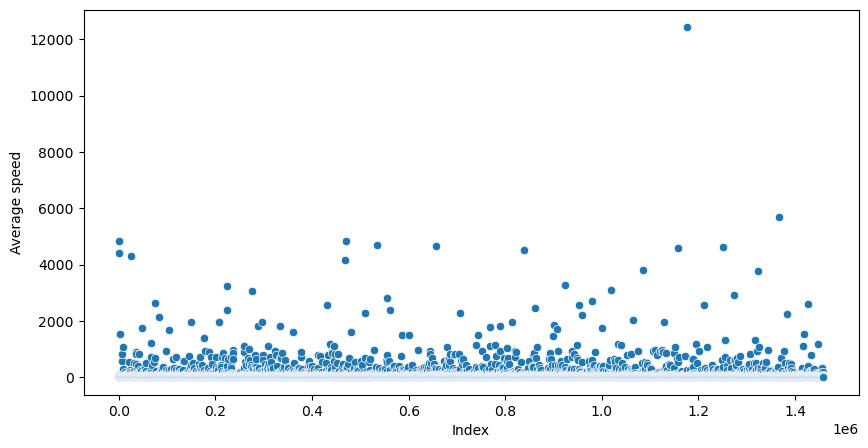

In [47]:
avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed');

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч! 

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч. 


This is precisely where we see that we have "teleportation trips" for which the average speed is over 1,000 km/h. There's even one where the average speed was over 12,000 km/h!

Let's agree that the maximum average speed taxi drivers can reach is 300 km/h.

### Задание 2.11.
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных. 

б) Сколько выбросов по признаку скорости вам удалось найти?

### Task 2.11.
Find trips that last longer than 24 hours and remove them from the dataset.

a) How many outliers based on trip duration did you find?

Find trips whose average speed along the shortest route exceeds 300 km/h and remove them from the data.

b) How many outliers based on speed did you find?

In [48]:
# ваш код здесь
over_duration = (taxi_data['trip_duration'] /3600) > 24.0
over_duration.sum()

4

In [49]:
taxi_data = taxi_data.drop(taxi_data[over_duration].index)

In [50]:
avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6

In [51]:
over_speed = avg_speed > 300.0
over_speed.sum()

407

In [52]:
taxi_data = taxi_data.drop(taxi_data[over_speed].index)

## 3. Разведывательный анализ данных (EDA)

В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных; 
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими; исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.


Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


## 3. Exploratory Data Analysis (EDA)

In this part of our project, we will:
* Examine the dataset we've compiled;
* Try to find patterns that will allow us to formulate preliminary hypotheses regarding which factors are decisive in determining trip duration;
* Supplement our analysis with visualizations illustrating our research. Try to design your diagrams with passion, not just for show: the skills of visualizing your findings will definitely come in handy in the future.

Let's start with the target feature. Looking ahead, we'll say that the primary metric for the quality of the solution to this problem will be RMSLE (Root Mean Squared Log Error), which is calculated based on the target variable on a logarithmic scale. In this case, it makes sense to immediately take the logarithm of the trip duration feature and consider the logarithm as the target feature in the analysis:
$$trip\_duration\_log = log(trip\_duration+1),$$
where log refers to the natural logarithm.


In [53]:
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration']+1)

### Задание 3.1.
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log). 
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным? 
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$. 

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

### Task 3.1.
Plot a histogram and a boxplot of trip durations on a logarithmic scale (trip_duration_log).
Based on the visualization, do you predict whether the resulting distribution is normal?
Test your hypothesis using the D'Agostino test at a significance level of 0.05.

a) What is the calculated p-value? Round your answer to the nearest hundredth.

b) Is the distribution of trip durations on a logarithmic scale normal?

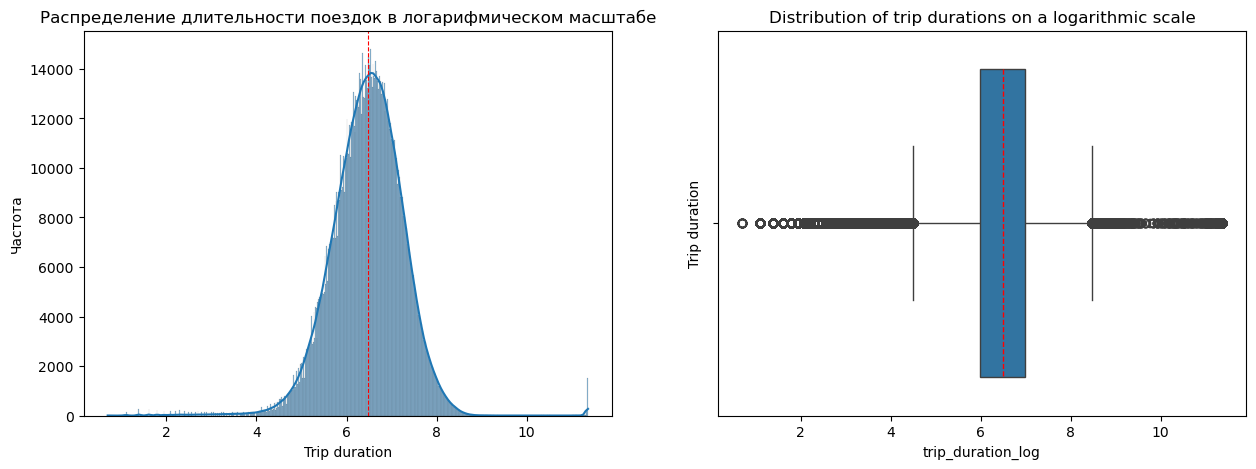

In [54]:
# ваш код здесь
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(taxi_data['trip_duration_log'], kde=True, ax=axes[0])
axes[0].set(xlabel='Trip duration', ylabel='Частота')
axes[0].set_title('Распределение длительности поездок в логарифмическом масштабе')
axes[0].axvline(taxi_data['trip_duration_log'].mean(), color='red', linestyle='--', linewidth=0.8)

sns.boxplot(taxi_data['trip_duration_log'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(ylabel='Trip duration')
axes[1].set_title('Distribution of trip durations on a logarithmic scale')

plt.show()

**Проверка на нормальность**

С помощью теста Д’Агостино проверим, распределён ли признак нормально.

*Нулевая гипотеза* ($H_0$): распределение trip_duration_log является нормальным

*Альтернативная гипотеза* ($H_1$): распределение trip_duration_log не является нормальным

Уровень значимости:

   $𝛼$ = 0.05

**Testing for Normality**

Using the D'Agostino test, we'll check whether the feature is normally distributed.

Null Hypothesis ($H_0): The distribution of trip_duration_log is normal.

Alternative Hypothesis ($H_1): The distribution of trip_duration_log is not normal.

Significance Level:

$𝛼$ = 0.05

In [55]:
from scipy.stats import normaltest

stat, p_value = normaltest(taxi_data['trip_duration_log'])

round(p_value, 2)

0.0

**Вывод**

По результатам теста Д’Агостино–Пирсона при уровне значимости 0.05 нулевая гипотеза о нормальности распределения логарифмированной длительности поездки отвергается. Нет оснований утверждать, что распределение логарифмированного целевого признака является нормальным.

**Conclusion**

Based on the D'Agostino–Pearson test results at a significance level of 0.05, the null hypothesis of a normal distribution of log trip duration is rejected. There is no basis for assuming that the log target variable is normally distributed.

### Задание 3.2.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id). 

Сравните два распределения между собой.

### Task 3.2.
Build a visualization that compares the distribution of trip duration on a logarithmic scale (trip_duration_log) by taxi company (vendor_id).

Compare the two distributions.

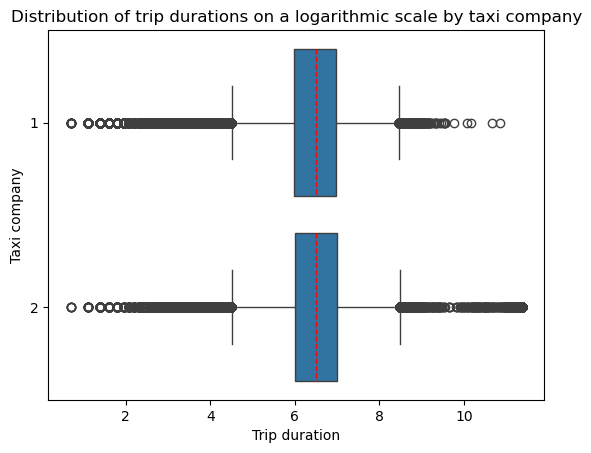

In [56]:
# ваш код здесь
ax = sns.boxplot(taxi_data, x='trip_duration_log', y='vendor_id', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Trip duration', ylabel='Taxi company')
plt.title('Distribution of trip durations on a logarithmic scale by taxi company')
plt.show()

**Вывод**

Существенных различий в центральных тенденциях распределений не наблюдается, однако для таксопарка 2 характерно большее количество выбросов с правой стороны распределения.

**Conclusion**

There are no significant differences in the central tendencies of the distributions, however, taxi company 2 is characterized by a greater number of outliers on the right side of the distribution.

### Задание 3.3.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag). 

Сравните два распределения между собой.

### Task 3.3.
Build a visualization that compares the distribution of trip duration on a logarithmic scale (trip_duration_log) depending on the message sending flag (store_and_fwd_flag).

Compare the two distributions.

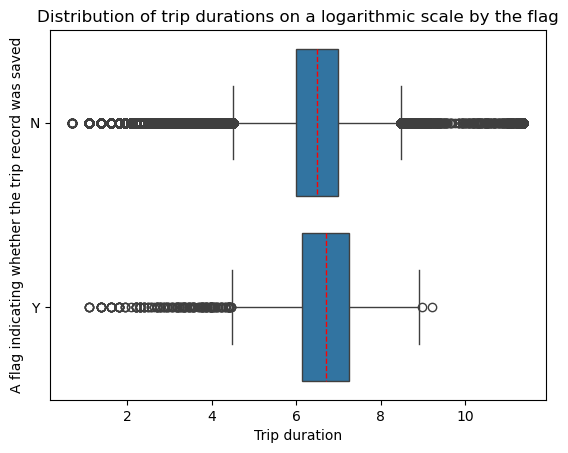

In [57]:
# ваш код здесь
ax = sns.boxplot(taxi_data, x='trip_duration_log', y='store_and_fwd_flag', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Trip duration', ylabel='A flag indicating whether the trip record was saved')
plt.title('Distribution of trip durations on a logarithmic scale by the flag')
plt.show()

**Вывод**

Распределения логарифмированной длительности поездки для обоих значений признака store_and_fwd_flag имеют схожие медианы и межквартильные размахи. При этом для поездок с флагом N наблюдается более длинный правый хвост распределения, что указывает на большее количество экстремально длительных поездок по сравнению с группой Y.

**Conclusion**

The log trip duration distributions for both values of the store_and_fwd_flag feature have similar medians and interquartile ranges. However, trips with the N flag exhibit a longer right tail, indicating a higher proportion of extremely long trips compared to the Y group.

### Задание 3.4.
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

### Task 3.4.
Create two visualizations:
* Distribution of the number of trips by hour of day;
* Dependence of the median trip duration on the hour of day.

Based on the graphs created, answer the following questions:

a) At what time of day are taxis ordered the least?

b) At what time of day does the median trip duration peak?

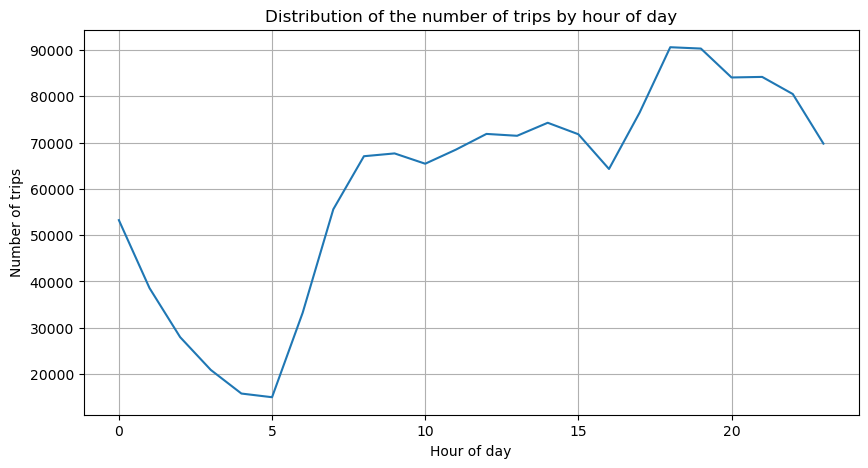

In [58]:
# ваш код здесь
# Группируем необходимые признаки для агрегации
# Group the necessary features for aggregation
trips_by_hour = taxi_data.groupby('pickup_hour').size().reset_index(name='trip_count')

# Строим график распределение количества поездок в зависимости от часа дня
# We plot a graph of the distribution of the number of trips depending on the hour of the day
plt.figure(figsize=(10, 5))
plt.plot(trips_by_hour['pickup_hour'], trips_by_hour['trip_count'])
plt.xlabel('Hour of day')
plt.ylabel('Number of trips')
plt.title('Distribution of the number of trips by hour of day')
plt.grid(True)
plt.show()

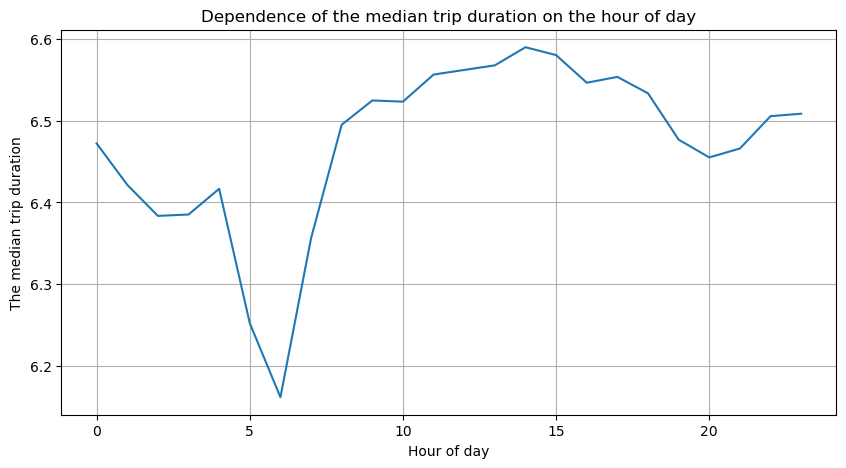

In [59]:
# Группируем необходимые признаки для агрегации
# Group the necessary features for aggregation
median_duration_by_hour = taxi_data.groupby('pickup_hour')['trip_duration_log'].median().reset_index()

# Строим график зависимость медианной длительности поездки от часа дня
# We plot a graph showing the dependence of the median trip duration on the hour of the day
plt.figure(figsize=(10, 5))
plt.plot(median_duration_by_hour['pickup_hour'], median_duration_by_hour['trip_duration_log'])
plt.xlabel('Hour of day')
plt.ylabel('The median trip duration')
plt.title('Dependence of the median trip duration on the hour of day')
plt.grid(True)
plt.show()

а) Реже всего такси заказывают ночью (0–5 часов утра).

б) Пик медианной длительности — вечером (час пик).

a) Taxis are least likely to be ordered at night (0:00–5:00 AM).

b) The peak median duration is in the evening (rush hour).

### Задание 3.5.
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:
а) В какой день недели совершается больше всего поездок?
б) В какой день недели медианная длительность поездок наименьшая?


### Task 3.5.
Create two visualizations:
* Distribution of the number of trips by day of the week;
* Dependence of the median trip duration on the day of the week.

Based on the graphs created, answer the following questions:
a) Which day of the week has the most trips?
b) Which day of the week has the shortest median trip duration?

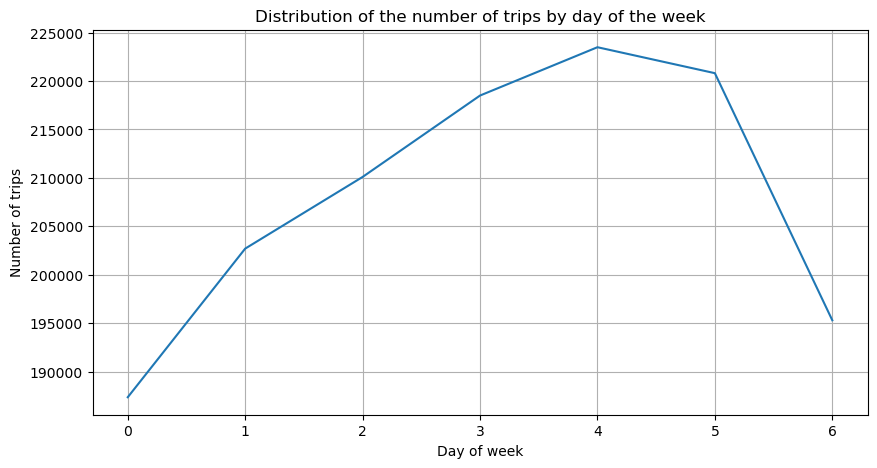

In [60]:
# ваш код здесь
# Группируем необходимые признаки для агрегации
# Group the necessary features for aggregation
trips_by_day_of_week = taxi_data.groupby('pickup_day_of_week').size().reset_index(name='trip_count')

# Строим график распределение количества поездок в зависимости от дня недели
# We plot a graph of the distribution of the number of trips by day of the week
plt.figure(figsize=(10, 5))
plt.plot(trips_by_day_of_week['pickup_day_of_week'], trips_by_day_of_week['trip_count'])
plt.xlabel('Day of week')
plt.ylabel('Number of trips')
plt.title('Distribution of the number of trips by day of the week')
plt.grid(True)
plt.show()

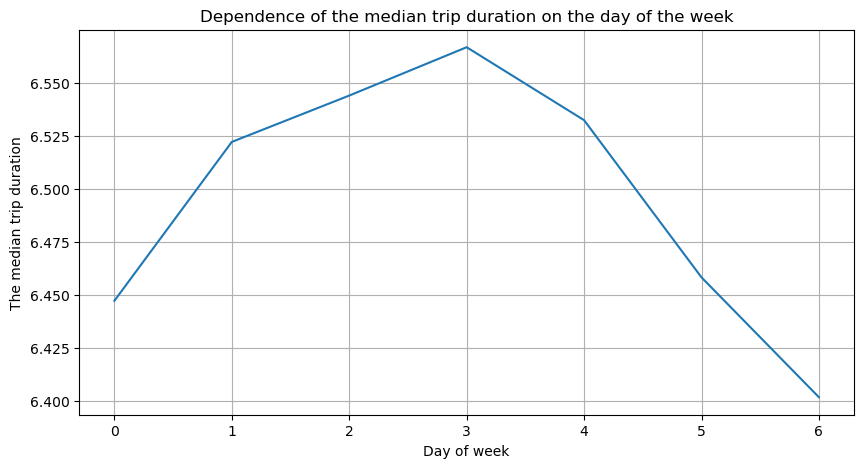

In [61]:
# Группируем необходимые признаки для агрегации
# Group the necessary features for aggregation
median_duration_by_day = taxi_data.groupby('pickup_day_of_week')['trip_duration_log'].median().reset_index()

# Строим график зависимость медианной длительности поездки от дня недели
# We plot a graph showing the dependence of the median trip duration on the day of week
plt.figure(figsize=(10, 5))
plt.plot(median_duration_by_day['pickup_day_of_week'], median_duration_by_day['trip_duration_log'])
plt.xlabel('Day of week')
plt.ylabel('The median trip duration')
plt.title('Dependence of the median trip duration on the day of the week')
plt.grid(True)
plt.show()

а) В пятницу совершается большего всего поездок.

б) В воскресенье медианная длительность поездок наименьшая.

a) Friday has the most trips.

b) Sunday has the shortest median trip duration.

### Задание 3.6.
Посмотрим на обе временные характеристики одновременно. 

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration). 

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

### Task 3.6.
Let's look at both time characteristics simultaneously.

Build a pivot table with rows representing hours (pickup_hour), columns representing days of the week (pickup_day_of_week), and cells representing median trip duration (trip_duration).

Visualize the resulting pivot table using a heatmap (recommended color palette: coolwarm).

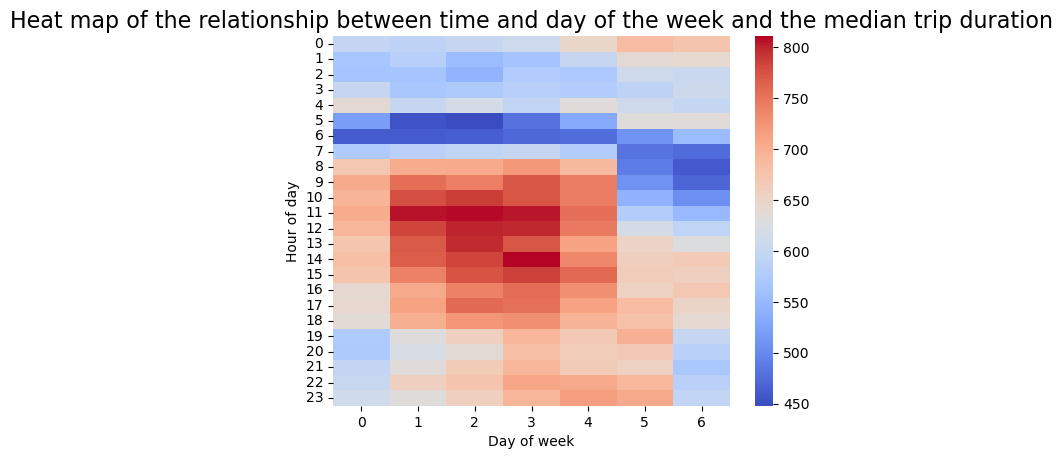

In [62]:
# ваш код здесь
# Создаем сводную таблицу
# Create a pivot table
pivot_taxi_data = taxi_data.pivot_table(
    values = 'trip_duration',
    index = 'pickup_hour',
    columns = 'pickup_day_of_week',
    aggfunc = 'median'
)

# Создаем тепловую карту зависимости времени и дня недели от медианной длительности поездки
# Create a heat map of the relationship between time and day of the week and the median trip duration
heatmap = sns.heatmap(data=pivot_taxi_data, cmap='coolwarm')
heatmap.set_xlabel('Day of week')
heatmap.set_ylabel('Hour of day')
heatmap.set_title('Heat map of the relationship between time and day of the week and the median trip duration', fontsize=16);
plt.show()

### Задание 3.7.
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude) 
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude). 
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:
 
city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее. 

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.  


### Task 3.7.
Plot two scatter plots:
* the first should illustrate the geographic locations of pickup points (pickup_longitude, pickup_latitude)
* the second should illustrate the geographic locations of dropoff points (dropoff_longitude, dropoff_latitude).

To do this, plot latitude (longitude) on the x-axis and longitude (latitude) on the y-axis in the plots.

Include only those points within the New York City limits in the visualization - add the following constraints to the x- and y-axes:

city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Color the plots based on the ten geographic clusters (geo_cluster) generated earlier.

**Recommendation:** For clarity, reduce the size of the dots in the scatterplot.

In [63]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

# ваш код здесь
# Фильтрация точек начала поездки
# Filtering trip start points
pickup_mask = (
    taxi_data['pickup_longitude'].between(*city_long_border) &
    taxi_data['pickup_latitude'].between(*city_lat_border)
)

pickup_points = taxi_data[pickup_mask]

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


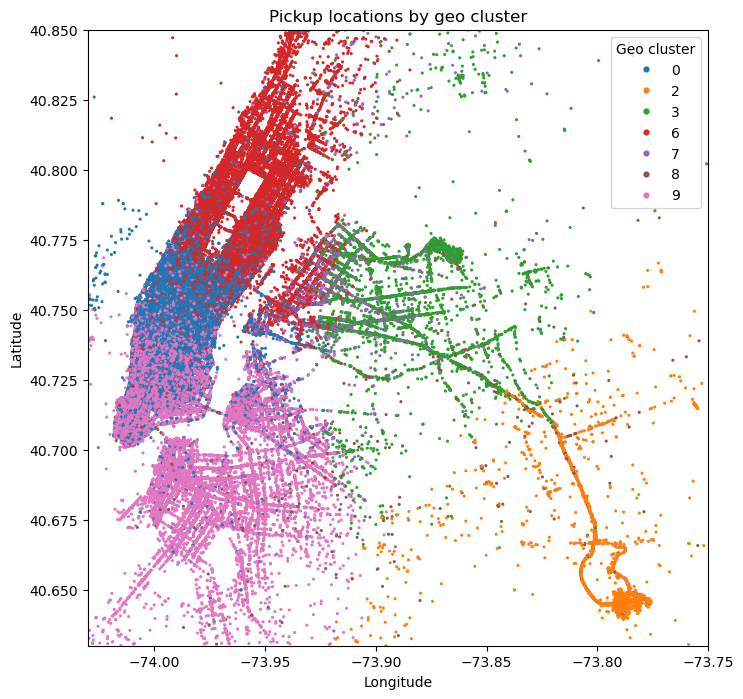

In [64]:
# Строим график для точек начала поездки
# We plot a graph for the starting points of the trip
plt.figure(figsize=(8, 8))
sns.scatterplot(
    data=pickup_points,
    x='pickup_longitude',
    y='pickup_latitude',
    hue='geo_cluster',
    palette='tab10',
    s=5,
    linewidth=0
)

plt.xlim(city_long_border)
plt.ylim(city_lat_border)
plt.title('Pickup locations by geo cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Geo cluster', markerscale=2)
plt.show()

In [65]:
# Фильтрация точек окончания поездки
# Filtering trip end points
dropoff_mask = (
    taxi_data['dropoff_longitude'].between(*city_long_border) &
    taxi_data['dropoff_latitude'].between(*city_lat_border)
)

dropoff_points = taxi_data[dropoff_mask]

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


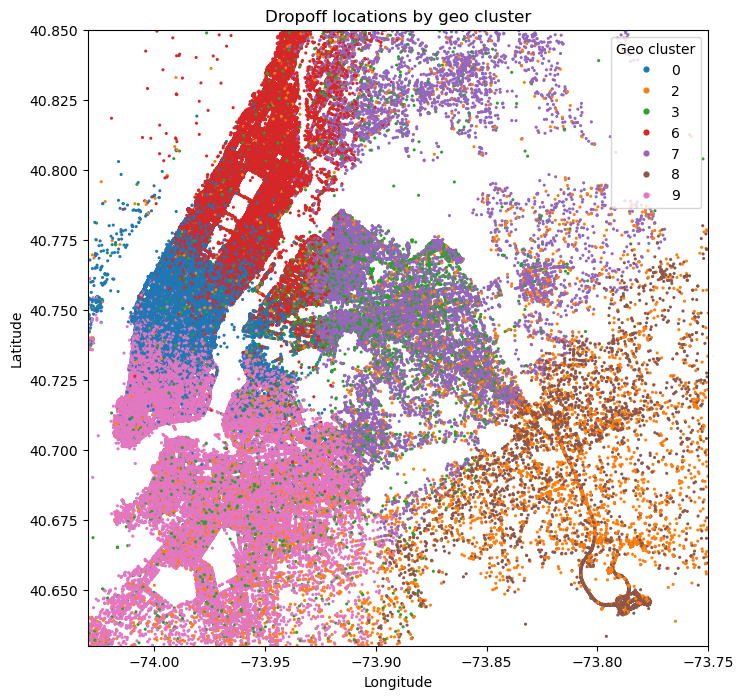

In [66]:
# Строим график для точек окончания поездки
# We plot a graph for the end points of the trip
plt.figure(figsize=(8, 8))
sns.scatterplot(
    data=dropoff_points,
    x='dropoff_longitude',
    y='dropoff_latitude',
    hue='geo_cluster',
    palette='tab10',
    s=5,
    linewidth=0
)

plt.xlim(city_long_border)
plt.ylim(city_lat_border)
plt.title('Dropoff locations by geo cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Geo cluster', markerscale=2)
plt.show()

**Вывод**

Анализ временных и пространственных характеристик поездок показывает, что использование такси в Нью-Йорке имеет ярко выраженную недельную, суточную и географическую структуру. Будние дни характеризуются большим числом коротких поездок, в то время как в выходные дни поездки становятся менее частыми, но более продолжительными. Географически поездки концентрируются в центральных районах города, что подтверждает влияние деловой и социальной активности на спрос на такси.

**Conclusion**

An analysis of the temporal and spatial characteristics of trips reveals that taxi use in New York City has a distinct weekly, daily, and geographic structure. Weekdays are characterized by a high number of short trips, while on weekends, trips become less frequent but longer. Geographically, trips are concentrated in the city's central areas, confirming the influence of business and social activity on taxi demand.

## 4. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


## 4. Selection and transformation of features

Before we move on to building the model, there are a few more steps to complete.
* It's important to remember that many machine learning algorithms cannot process categorical features in their natural form. Therefore, we need to encode them;
* We need to select the features we will use to train the model;
* We need to scale and transform some features to improve the convergence of models based on numerical methods.

In [67]:
print('Shape of data: {}'.format(taxi_data.shape))
print('Columns: {}'.format(taxi_data.columns))

Shape of data: (1458233, 27)
Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_day_of_week',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'visibility', 'wind speed', 'precip', 'events',
       'trip_duration_log'],
      dtype='object')


Для удобства работы сделаем копию исходной таблицы с поездками:

For ease of use, let's make a copy of the original table with trips:

In [68]:
train_data = taxi_data.copy()
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events,trip_duration_log
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,5.0,1.498521,99.970196,6,4.4,8.0,27.8,0.3,None,6.122493
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6.0,1.805507,-117.153768,9,28.9,16.1,7.4,0.0,None,6.498282
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,16.0,6.385098,-159.680165,9,-6.7,16.1,24.1,0.0,None,7.661527
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4.0,1.485498,-172.737700,9,7.2,16.1,25.9,0.0,None,6.063785
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5.0,1.188588,179.473585,6,9.4,16.1,9.3,0.0,None,6.077642


### Задание 4.1.
Сразу позаботимся об очевидных неинформативных и избыточных признаках. 

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?

б) Утечка данных (data leak) - это…

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных?

г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными. Сколько столбцов в таблице у вас осталось?


### Task 4.1.
Let's address the obvious uninformative and redundant features right away.

a) Which feature is unique to each trip and doesn't provide useful information for determining its duration?

b) A data leak is...

c) Consider which feature in the training dataset creates a data leak?

d) Remove the features selected in steps a) and c) from the original data table. How many columns are left in the table?

In [69]:
# ваш код здесь
# Удаляем неинформативный и избыточный признаки
# Remove uninformative and redundant features
train_data = train_data.drop(columns=['id', 'dropoff_datetime'])
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458233 entries, 0 to 1458643
Data columns (total 25 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   vendor_id           1458233 non-null  int64         
 1   pickup_datetime     1458233 non-null  datetime64[ns]
 2   passenger_count     1458233 non-null  int64         
 3   pickup_longitude    1458233 non-null  float64       
 4   pickup_latitude     1458233 non-null  float64       
 5   dropoff_longitude   1458233 non-null  float64       
 6   dropoff_latitude    1458233 non-null  float64       
 7   store_and_fwd_flag  1458233 non-null  object        
 8   trip_duration       1458233 non-null  int64         
 9   pickup_date         1458233 non-null  datetime64[ns]
 10  pickup_hour         1458233 non-null  int32         
 11  pickup_day_of_week  1458233 non-null  int32         
 12  pickup_holiday      1458233 non-null  int64         
 13  total_distance   

Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


Previously, we extracted all the information we needed from the trip start date, now we can get rid of these features, since we will no longer need them:

In [70]:
drop_columns = ['pickup_datetime', 'pickup_date']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458233, 23)


### Задание 4.2.

Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 0, если идентификатор таксопарка равен 1, и 1 — в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение 'N', и 1 — в противном случае.

а) Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.

б) Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.


### Task 4.2.

Encode the vendor_id column in the train_data table so that it is equal to 0 if the taxi company ID is 1, and 1 otherwise.

Encode the store_and_fwd_flag column in the train_data table so that it is equal to 0 if the flag is set to 'N', and 1 otherwise.

a) Calculate the mean for the encoded vendor_id column. Provide your answer to two hundredths.

b) Calculate the mean for the encoded store_and_fwd_flag column. Provide your answer to two thousandths.

In [71]:
# ваш код здесь
# Кодируем признак vendor_id 
# Encoding the vendor_id attribute
train_data['vendor_id'] = (train_data['vendor_id'] != 1).astype(int)

In [72]:
# Кодируем признак store_and_fwd_flag
# Encoding the store_and_fwd_flag_id attribute
train_data['store_and_fwd_flag'] = (train_data['store_and_fwd_flag'] != 'N').astype(int)

train_data.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_day_of_week,...,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events,trip_duration_log
0,1,1,-73.982155,40.767937,-73.964630,40.765602,0,455,17,0,...,5.0,1.498521,99.970196,6,4.4,8.0,27.8,0.3,None,6.122493
1,0,1,-73.980415,40.738564,-73.999481,40.731152,0,663,0,6,...,6.0,1.805507,-117.153768,9,28.9,16.1,7.4,0.0,None,6.498282
2,1,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,11,1,...,16.0,6.385098,-159.680165,9,-6.7,16.1,24.1,0.0,None,7.661527
3,1,1,-74.010040,40.719971,-74.012268,40.706718,0,429,19,2,...,4.0,1.485498,-172.737700,9,7.2,16.1,25.9,0.0,None,6.063785
4,1,1,-73.973053,40.793209,-73.972923,40.782520,0,435,13,5,...,5.0,1.188588,179.473585,6,9.4,16.1,9.3,0.0,None,6.077642


In [73]:
mean_1 = train_data['vendor_id'].mean()
print(round(mean_1,2))

0.53


In [74]:
mean_2 = train_data['store_and_fwd_flag'].mean()
print(round(mean_2,3))

0.006


### Задание 4.3.
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEncoder из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

В параметре handle_unknown установите значение 'ignore'. Это позволит коду отработать без ошибок в случае появления в тестовой выборке значений, отсутствующих в обучающей выборке.

В результате работы OneHotEncoder вы получите безымянный numpy-массив, который нам будет необходимо преобразовать обратно в DataFrame, для более удобной работы в дальнейшем. Чтобы получить имена закодированных столбцов у объекта типа OneHotEncoder есть специальный метод get_feature_names_out(). Он возвращает список новых закодированных имен столбцов в формате <оригинальное имя столбца>_<имя категории>.

Пример использования:

``` python
# Объявляем кодировщик
one_hot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
```

В этом псевдокоде:
* one_hot_encoder - объект класса OneHotEncoder
* data_onehot - numpy-массив, полученный в результате трансформации кодировщиком

В результате выполнения задания у вас должен быть образован DataFrame `data_onehot`, который содержит кодированные категориальные признаки pickup_day_of_week, geo_cluster и events. 


Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


### Task 4.3.
Create a data_onehot table from the one-hot-encoded features pickup_day_of_week, geo_cluster, and events in the train_data table using OneHotEncoder from the sklearn library. Set the drop parameter to 'first' to remove the first binary column, thereby avoiding creating redundant features.

Set the handle_unknown parameter to 'ignore'. This will allow the code to run without errors if values ​​appear in the test set that are not in the training set.

OneHotEncoder outputs an unnamed NumPy array, which we will need to convert back to a DataFrame for easier handling later. To obtain the names of the encoded columns, the OneHotEncoder object has a special method, get_feature_names_out(). It returns a list of new encoded column names in the format <original column name>_<category name>.

Example usage:

``` python
# Declare the encoder
one_hot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
# Get the encoded column names
column_names = one_hot_encoder.get_feature_names_out()
# Create a DataFrame from the encoded features
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
```

In this pseudocode:
* one_hot_encoder - an object of the OneHotEncoder class
* data_onehot - a Numpy array resulting from the transformation by the encoder

As a result of completing the task, you should have a DataFrame `data_onehot`, which contains the encoded categorical features pickup_day_of_week, geo_cluster, and events.

How many binary columns were you able to generate using one-hot encoding?

In [75]:
# ваш код здесь
from sklearn.preprocessing import OneHotEncoder

# Объявляем кодировщик
# Declare the encoder
one_hot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
# Кодируем необходимые признаки
# We encode the necessary features
data_onehot = one_hot_encoder.fit_transform(train_data[['pickup_day_of_week', 'geo_cluster', 'events']])
# Получаем закодированные имена столбцов
# Get the encoded column names
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
# Create a DataFrame from the encoded features
data_onehot = pd.DataFrame(data_onehot.toarray(), columns=column_names, index=train_data.index)
data_onehot.head()

,pickup_day_of_week_1,pickup_day_of_week_2,pickup_day_of_week_3,pickup_day_of_week_4,pickup_day_of_week_5,pickup_day_of_week_6,geo_cluster_1,geo_cluster_2,geo_cluster_3,geo_cluster_4,geo_cluster_5,geo_cluster_6,geo_cluster_7,geo_cluster_8,geo_cluster_9,events_None,events_Rain,events_Snow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [76]:
data_onehot.shape[1]

18

Добавим полученную таблицу с закодированными признаками:

Let's add the resulting table with encoded features:

In [77]:
columns_to_change = ['pickup_day_of_week', 'geo_cluster', 'events']
train_data = train_data.drop(columns_to_change, axis=1)
train_data = pd.concat([train_data, data_onehot], axis=1)
print('Shape of data: {}'.format(train_data.shape))

Shape of data: (1458233, 38)


In [78]:
train_data.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_holiday,...,geo_cluster_3,geo_cluster_4,geo_cluster_5,geo_cluster_6,geo_cluster_7,geo_cluster_8,geo_cluster_9,events_None,events_Rain,events_Snow
0,1,1,-73.982155,40.767937,-73.964630,40.765602,0,455,17,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,1,-73.980415,40.738564,-73.999481,40.731152,0,663,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,11,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1,1,-74.010040,40.719971,-74.012268,40.706718,0,429,19,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1,1,-73.973053,40.793209,-73.972923,40.782520,0,435,13,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


Now that the categorical features have been preprocessed, we'll form the observation matrix X, the target variable vector y, and its logarithm y_log. The observation matrix will include all columns from the trip table except the target feature trip_duration and its logarithmized version trip_duration_log:

In [79]:
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии y_log. 

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

We'll train all our models using the logarithmic version of y_log.

The chosen validation type is holdout. We'll split the dataset into training and validation at a ratio of 67/33:

In [80]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log, 
    test_size=0.33, 
    random_state=42
)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


At this point, we have quite a few features; most likely, not all of them will be important. Let's retain only those that are most strongly related to the target variable and are sure to contribute to improving the model's quality.

### Задание 4.4.
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных


### Task 4.4.
Using SelectKBest, select the 25 features that best predict the target variable on a logarithmic scale. Perform the selection on the training set using the score_func = f_regression parameter.

Indicate the features included in the list of selected features.

In [81]:
# ваш код здесь
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(f_regression, k=25)
selector.fit(X_train, y_train_log)
 
names = selector.get_feature_names_out()
print(names)

['vendor_id' 'passenger_count' 'pickup_longitude' 'pickup_latitude'
 'dropoff_longitude' 'dropoff_latitude' 'store_and_fwd_flag' 'pickup_hour'
 'pickup_holiday' 'total_distance' 'total_travel_time' 'number_of_steps'
 'haversine_distance' 'temperature' 'pickup_day_of_week_1'
 'pickup_day_of_week_2' 'pickup_day_of_week_3' 'pickup_day_of_week_4'
 'pickup_day_of_week_5' 'pickup_day_of_week_6' 'geo_cluster_2'
 'geo_cluster_3' 'geo_cluster_6' 'geo_cluster_7' 'geo_cluster_8']


In [82]:
scores = pd.Series(
    selector.scores_,
    index=X_train.columns
).sort_values(ascending=False)

scores.head(25)

total_travel_time       955479.068235
total_distance          655929.431781
number_of_steps         611337.580202
haversine_distance      581670.762721
geo_cluster_2            43889.686720
geo_cluster_6            31240.068261
geo_cluster_7            30832.201939
geo_cluster_8            28339.005772
geo_cluster_3            28106.948771
pickup_latitude          23435.429382
dropoff_latitude         15850.069408
pickup_longitude         14829.632087
dropoff_longitude         6367.124316
temperature               3266.400316
pickup_day_of_week_6      1943.665070
pickup_hour               1546.817560
pickup_day_of_week_3       959.208273
pickup_holiday             609.273590
pickup_day_of_week_5       606.627793
pickup_day_of_week_2       583.529967
passenger_count            396.707626
vendor_id                  345.587625
pickup_day_of_week_4       281.831267
store_and_fwd_flag         241.019017
pickup_day_of_week_1       179.139493
dtype: float64

In [83]:
# Сформируем новую матрицу наблюдений X, с учетом 25-ти важных признаков
# Let's form a new observation matrix X, taking into account 25 important features
X = train_data[names]
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

In [84]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log, 
    test_size=0.33, 
    random_state=42
)

Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов. 


Since we will be using various models, including those that incorporate numerical optimization methods, let's take care of the scaling of factors in advance.

### Задание 4.5.
Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых.


### Task 4.5.
Normalize the predictors in the training and validation sets using MinMaxScaler from the sklearn library. Remember that the normalizer is trained on the training set, and the transformation is performed on both the training and validation sets!

Calculate the arithmetic mean for the first predictor (i.e., the first column of the matrix) from the validation set. Round your answer to two decimal places.

In [85]:
# ваш код здесь
from sklearn.preprocessing import MinMaxScaler

# инициализируем нормализатор MinMaxScaler
# initialize the MinMaxScaler normalizer
scaler = MinMaxScaler()
# обучаем нормализатор на обучающей выборке
# train the normalizer on the training sample
scaler.fit(X_train)
# Трансформируем обе выборки
# Transform both samples
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [86]:
mean_first_feature = X_valid_scaled[:,0].mean()
print(round(mean_first_feature,2))

0.54


## 5. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$ 



## 5. Solving a Regression Problem: Linear Regression and Decision Trees

Let's define a metric by which we will measure the quality of our models. We will follow the original Kaggle competition's guidelines and use RMSLE (Root Mean Squared Log Error) as the metric, which is calculated as:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
where:
* $y_i$ is the true duration of the i-th taxi trip (trip_duration)
* $\hat{y_i}$ is the duration of the i-th taxi trip predicted by the model

Note that we have already logarithmed the target feature, so we will only need to calculate the RMSE metric for a model trained to predict taxi trip duration on a logarithmic scale:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$

### Задание 5.1.
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


### Task 5.1.
Build a linear regression model on the training set (factors should be normalized, and the target variable should be on a logarithmic scale). Leave all parameters at their default values.

For the resulting model, calculate the RMSLE metric on the training and validation sets. Round your answer to two decimal places.

In [87]:
# ваш код здесь
# Создаём объект класса LinearRegression
# Create an object of the LinearRegression class
lr = linear_model.LinearRegression()
# Обучаем модель
# Training the model
lr.fit(X_train_scaled, y_train_log)

# Предсказываем
# Predict
y_train_pred = lr.predict(X_train_scaled)
y_valid_pred = lr.predict(X_valid_scaled)

from sklearn.metrics import mean_squared_error

# Рассчитываем метрику RMSLE на тренировочной и валидационной выборках
# Calculate the RMSLE metric on the training and validation sets
rmsle_train = np.sqrt(mean_squared_error(y_train_log, y_train_pred))
rmsle_valid = np.sqrt(mean_squared_error(y_valid_log, y_valid_pred))

round(rmsle_train, 2), round(rmsle_valid, 2)

(0.54, 0.54)

### Задание 5.2.
Сгенерируйте полиномиальные признаки 2-ой степени с помощью PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Постройте модель полиномиальной регрессии 2-ой степени на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


### Task 5.2.
Generate second-degree polynomial features using PolynomialFeatures from the sklearn library. Set the include_bias parameter to False.

Build a second-degree polynomial regression model on the training set (factors should be normalized, and the target variable should be on a logarithmic scale). Leave all parameters at their default values.

a) Calculate the RMSLE metric for the resulting model on the training and validation sets. Round your answer to two decimal places.

b) Does your model show signs of overfitting?

In [88]:
# ваш код здесь
# Создаём генератор полиномиальных признаков
# Create a polynomial feature generator
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)
# Генерируем полиномиальные признаки для тренировочной выборки
# Generate polynomial features for the training sample
X_train_poly = poly.transform(X_train_scaled)
# Генерируем полиномиальные признаки для валидацинной выборки
# Generate polynomial features for the validation sample
X_valid_poly = poly.transform(X_valid_scaled)
# Выводим результирующие размерности таблиц
# Output the resulting table dimensions
print(X_train_poly.shape)
print(X_valid_poly.shape)

(977016, 350)
(481217, 350)


In [89]:
# Создаём объект класса LinearRegression
# Create an object of the LinearRegression class
lr_model_poly = linear_model.LinearRegression()
# Обучаем модель
# Train the model
lr_model_poly.fit(X_train_poly, y_train_log)
# Делаем предсказание для тренировочной выборки
# Making a prediction for the training set
y_train_predict_poly = lr_model_poly.predict(X_train_poly)
# Делаем предсказание для валидацинной выборки
# Making a prediction for the validation sample
y_valid_predict_poly = lr_model_poly.predict(X_valid_poly)
 
# Рассчитываем метрику RMSLE на тренировочной и валидационной выборках
# Calculate the RMSLE metric on the training and validation sets
rmsle_train = np.sqrt(mean_squared_error(y_train_log, y_train_predict_poly))
rmsle_valid = np.sqrt(mean_squared_error(y_valid_log, y_valid_predict_poly))

round(rmsle_train, 2), round(rmsle_valid, 2)

(0.47, 0.69)

Для полиномиальной регрессии второй степени значение RMSLE на обучающей выборке существенно ниже, чем на валидационной (0.47 против 0.69), что свидетельствует о наличии выраженного переобучения модели.

For the second-degree polynomial regression, the RMSLE value on the training sample is significantly lower than on the validation sample (0.47 versus 0.69), which indicates the presence of significant overfitting of the model.

### Задание 5.3.
Постройте модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha$ установите равным 1, остальные параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


### Task 5.3.
Build a second-degree polynomial regression model with L2 regularization (Tikhonov regularization) on the training set (factors should be normalized, and the target variable should be on a logarithmic scale). Set the regularization coefficient $\alpha$ to 1, and leave the other parameters at their default values.

For the resulting model, calculate the RMSLE metric on the training and validation sets. Round your answer to two decimal places.

In [90]:
# ваш код здесь
# Создаём объект класса линейной регрессии с L2-регуляризацией
# Create an object of the linear regression class with L2 regularization
ridge_lr_poly = linear_model.Ridge(alpha=1)
# Обучаем модель
# Train the model
ridge_lr_poly.fit(X_train_poly, y_train_log)
# Делаем предсказание для тренировочной выборки
# Making a prediction for the training set
y_train_predict_poly = ridge_lr_poly.predict(X_train_poly)
# Делаем предсказание для валидационной выборки
# Making a prediction for the validation sample
y_valid_predict_poly = ridge_lr_poly.predict(X_valid_poly)

# Рассчитываем метрику RMSLE на тренировочной и валидационной выборках
# Calculate the RMSLE metric on the training and validation sets
rmsle_train = np.sqrt(mean_squared_error(y_train_log, y_train_predict_poly))
rmsle_valid = np.sqrt(mean_squared_error(y_valid_log, y_valid_predict_poly))

round(rmsle_train, 2), round(rmsle_valid, 2)

(0.48, 0.48)

По сравнению с полиномиальной моделью без регуляризации, Ridge-регрессия демонстрирует уменьшение разрыва между ошибками на обучающей и валидационной выборках, что свидетельствует о снижении переобучения.

Compared to the polynomial model without regularization, Ridge regression shows a decrease in the gap between the errors on the training and validation sets, indicating a reduction in overfitting.

### Задание 5.4.
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию. 

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


### Task 5.4.
Build a decision tree model (DecisionTreeRegressor) on the training set (factors should be normalized, and the target variable should be on a logarithmic scale). Leave all parameters at default values.

a) Calculate the RMSLE metric for the resulting model on the training and validation sets. Round your answer to two decimal places.

b) Does your model show signs of overfitting?

In [93]:
# ваш код здесь
# Создаём объект класса DecisionTreeRegressor
# Create an object of the DecisionTreeRegressor class
dtree = tree.DecisionTreeRegressor(random_state=42)

# Обучаем дерево решений
# Training a decision tree
dtree.fit(X_train_scaled, y_train_log)

# Делаем предсказание для тренировочного набора данных
# Make a prediction for the training dataset
y_pred_train = dtree.predict(X_train_scaled)
# Делаем предсказание для валидационного набора данных
# Making a prediction for the validation dataset
y_pred_valid = dtree.predict(X_valid_scaled)

# Рассчитываем метрику RMSLE на тренировочной и валидационной выборках
# Calculate the RMSLE metric on the training and validation sets
rmsle_train = np.sqrt(mean_squared_error(y_train_log, y_pred_train))
rmsle_valid = np.sqrt(mean_squared_error(y_valid_log, y_pred_valid))

round(rmsle_train, 2), round(rmsle_valid, 2)

(0.0, 0.57)

Модель дерева решений демонстрирует сильное переобучение: RMSLE на обучающей выборке равен 0.00, тогда как на валидационной выборке составляет 0.57. Это связано с отсутствием ограничений на глубину дерева и минимальный размер листа.

The decision tree model exhibits severe overfitting: the RMSLE on the training set is 0.00, while on the validation set it is 0.57. This is due to the lack of restrictions on the tree depth and minimum leaf size.

### Задание 5.5.
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)

Параметр random_state задайте равным 42.

Постройте линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений. 

а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).

б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых.


### Task 5.5.
Enumerate all possible decision tree depths in the range from 7 to 20:

max_depths = range(7, 20)

Set the random_state parameter to 42.

Plot linear graphs of the RMSE metric change on the training and validation sets as a function of the decision tree depth parameter.

a) Find the optimal maximum tree depth for which the minimum RMSLE value will be observed on the training set, but overfitting will not yet be observed (the validation curve does not yet begin to increase).

b) What is the RMSLE metric value on the training and validation sets for a decision tree with the chosen optimal depth? Round your answer to hundredths.

In [198]:
# ваш код здесь
# Задаем варианты глубины дерева
# Set tree depth options
max_depths = range(7, 20)

# Создаем списки для хранения метрик
# Create lists to store metrics
rmsle_train_list = []
rmsle_valid_list = []

for depth in max_depths:
    
    # Создаём модель
    # Create a model
    dtree = tree.DecisionTreeRegressor(
        max_depth=depth,
        random_state=42
    )
    
    # Обучаем
    # Train
    dtree.fit(X_train_scaled, y_train_log)
    
    # Предсказываем
    # Predict
    y_train_pred = dtree.predict(X_train_scaled)
    y_valid_pred = dtree.predict(X_valid_scaled)
    
    # Рассчитываем RMSLE
    # Calculating RMSLE
    rmsle_train = np.sqrt(mean_squared_error(y_train_log, y_train_pred))
    rmsle_valid = np.sqrt(mean_squared_error(y_valid_log, y_valid_pred))
    
    # Сохраняем метрики
    # Save metrics
    rmsle_train_list.append(rmsle_train)
    rmsle_valid_list.append(rmsle_valid)

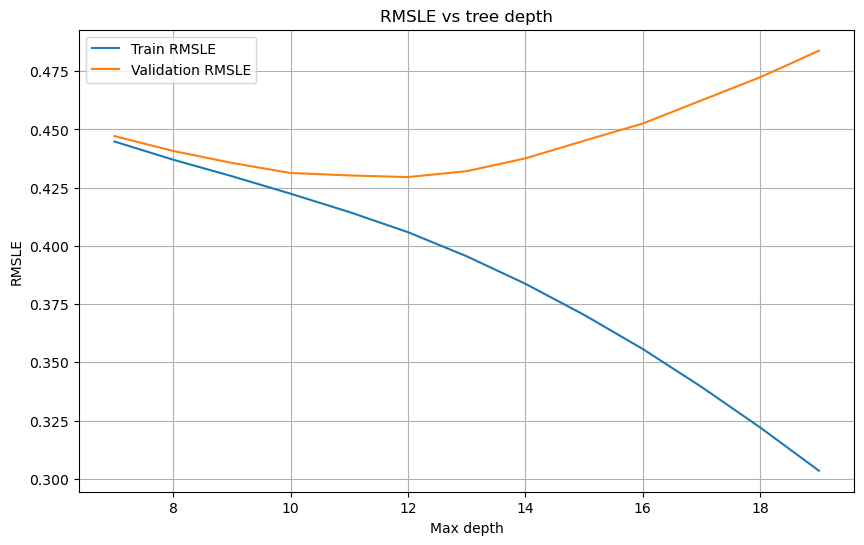

In [199]:
# Строим линейные графики изменения метрики RMSE
# We plot linear graphs of the RMSE metric changes
plt.figure(figsize=(10, 6))

plt.plot(max_depths, rmsle_train_list, label='Train RMSLE')
plt.plot(max_depths, rmsle_valid_list, label='Validation RMSLE')

plt.xlabel('Max depth')
plt.ylabel('RMSLE')
plt.title('RMSLE vs tree depth')
plt.legend()
plt.grid(True)

plt.show()

In [94]:
# Создаём модель для оптимального значения максимальной глубины дерева
# Create a model
dtree = tree.DecisionTreeRegressor(
        max_depth=12,
        random_state=42
)

dtree.fit(X_train_scaled, y_train_log)
    
# Предсказываем
# Predict
y_train_pred = dtree.predict(X_train_scaled)
y_valid_pred = dtree.predict(X_valid_scaled)
    
# Рассчитываем RMSLE
# Calculating RMSLE
rmsle_train = np.sqrt(mean_squared_error(y_train_log, y_train_pred))
rmsle_valid = np.sqrt(mean_squared_error(y_valid_log, y_valid_pred))

round(rmsle_train, 2), round(rmsle_valid, 2)

(0.41, 0.43)

Оптимальная глубина дерева решений — max_depth = 12, так как при данном значении достигается минимальное значение RMSLE на валидационной выборке до начала переобучения.

The optimal depth of the decision tree is max_depth = 12, since this value achieves the minimum RMSLE value on the validation sample before retraining begins.

## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза

Переходим к тяжелой артиллерии: ансамблевым алгоритмам.

## 6. Solving the regression problem: ensemble methods and forecasting

Let's move on to the heavy artillery: ensemble algorithms.

### Задание 6.1.

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


### Task 6.1.

Build a random forest model on the training set (factors should be normalized, and the target variable should be on a logarithmic scale). Specify the following hyperparameters:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Calculate the RMSLE metric for the resulting model on the training and validation sets. Round your answer to two decimal places.

In [95]:
# ваш код здесь
# Создаём объект класса случайный лес
# Create a random forest class object
rf = ensemble.RandomForestRegressor(
    n_estimators=200, #число деревьев #number of trees
    criterion='squared_error', #критерий эффективности #performance criterion
    max_depth=12, #максимальная глубина дерева #maximum tree depth
    min_samples_split=20, #минимальное число объектов для разбиения #minimum number of objects to split
    random_state=42
)
# Обучаем модель
# Train the model
rf.fit(X_train_scaled, y_train_log)

# Делаем предсказание на наших выборках
# We make a prediction based on our samples
y_train_pred = rf.predict(X_train_scaled)
y_valid_pred = rf.predict(X_valid_scaled)

# Рассчитываем RMSLE
# Calculating RMSLE
rmsle_train = np.sqrt(mean_squared_error(y_train_log, y_train_pred))
rmsle_valid = np.sqrt(mean_squared_error(y_valid_log, y_valid_pred))

round(rmsle_train, 2), round(rmsle_valid, 2)

(0.4, 0.41)

Случайный лес показывает меньший разрыв между тренировочной и валидационной ошибкой по сравнению с деревом решений, что говорит о лучшей обобщающей способности модели.

The random forest shows a smaller gap between the training and validation errors compared to the decision tree, indicating better generalization ability of the model.

### Задание 6.2.
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6, 
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


### Task 6.2.
Build a gradient boosting model over decision trees (GradientBoostingRegressor) on the training set (factors should be normalized, and the target variable should be on a logarithmic scale). Specify the following hyperparameters:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6,
* min_samples_split=30,
* random_state=42

Calculate the RMSLE metric for the resulting model on the training and validation sets. Round your answer to two decimal places.

In [96]:
# ваш код здесь
# Создаём объект класса случайный лес
# Create a random forest class object
gb = ensemble.GradientBoostingRegressor(
    learning_rate=0.5, #скорость обучения #learning speed
    n_estimators=100, #число деревьев #number of trees
    max_depth=6, #максимальная глубина дерева #maximum tree depth
    min_samples_split=30, #минимальное число объектов для разбиения #minimum number of objects to split
    random_state=42
)
# Обучаем модель
# Train the model
gb.fit(X_train_scaled, y_train_log)

# Делаем предсказание на наших выборках
# We make a prediction based on our samples
y_train_pred = gb.predict(X_train_scaled)
y_valid_pred = gb.predict(X_valid_scaled)

# Рассчитываем RMSLE
# Calculating RMSLE
rmsle_train = np.sqrt(mean_squared_error(y_train_log, y_train_pred))
rmsle_valid = np.sqrt(mean_squared_error(y_valid_log, y_valid_pred))

round(rmsle_train, 2), round(rmsle_valid, 2)

(0.37, 0.39)

### Задание 6.3.
Какая из построенных вами моделей показала наилучший результат (наименьшее значение RMSLE на валидационной выборке)?
* Линейная регрессия
* Полиномиальная регрессия 2ой степени
* Дерево решений
* Случайный лес
* Градиентный бустинг над деревьями решений


### Task 6.3.
Which of the models you built showed the best result (lowest RMSLE value on the validation set)?
* Linear regression
* Second-degree polynomial regression
* Decision tree
* Random forest
* Gradient boosting over decision trees

**Вывод**

Модель градиентного бустинга над деревьями решений показала наилучшее качество по метрике RMSLE на валидационной выборке (0.39). Разница между тренировочной и валидационной ошибкой незначительна, что свидетельствует об отсутствии переобучения и хорошей обобщающей способности модели. По сравнению с линейными моделями, одиночным деревом решений и случайным лесом, градиентный бустинг оказался наиболее эффективным подходом для решения поставленной задачи.

**Conclusion**

The gradient boosting model over decision trees demonstrated the best performance in terms of the RMSLE metric on the validation set (0.39). The difference between the training and validation errors is insignificant, indicating the absence of overfitting and good generalization of the model. Compared to linear models, a single decision tree, and a random forest, gradient boosting proved to be the most effective approach for solving this problem.

### Задание 6.4.
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.


### Task 6.4.
Plot a bar chart of the significance coefficients for each factor.

Indicate the top three factors most significant for predicting the target feature—trip duration—on a logarithmic scale.

In [97]:
# ваш код здесь
# Выводим коэффициенты значимости факторов
# We derive the coefficients of significance of factors
importances = gb.feature_importances_

feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

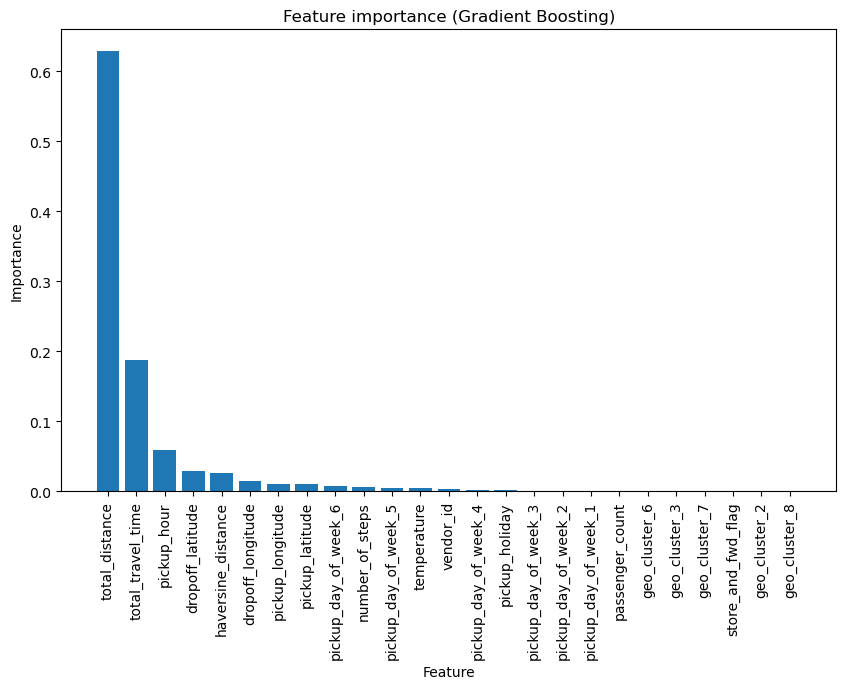

In [98]:
# Строим столбчатую диаграмму
# Building a bar chart
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=90)
plt.title('Feature importance (Gradient Boosting)')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()

In [99]:
feature_importance.head(3)

,feature,importance
9,total_distance,0.628119
10,total_travel_time,0.186875
7,pickup_hour,0.059080


### Задание 6.5.
Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведите в минуты и округлите до десятых.


### Task 6.5.
For the best of the constructed models, calculate the median absolute error (MeAE - in sklearn, the median_absolute_error function) of the taxi trip duration prediction on the validation set:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Convert the MeAE metric value to minutes and round to the nearest tenth.

In [100]:
# ваш код здесь
from sklearn.metrics import median_absolute_error

# Получаем предсказания на валидационной выборке GBR
# Obtaining predictions on the GBR validation sample
y_valid_pred_log = gb.predict(X_valid_scaled)

# Возвращаемся в исходный масштаб
# Return to the original scale
y_valid_pred = np.exp(y_valid_pred_log) - 1
y_valid_true = np.exp(y_valid_log) - 1

# Считаем MeAE
# Calculate MeAE
meae_seconds = median_absolute_error(y_valid_true, y_valid_pred)

# Переводим в минуты и округляем
# Convert to minutes and round up
meae_minutes = meae_seconds / 60
round(meae_minutes, 1)

1.8

Финальный шаг - сделать submit -  предсказание для отложенного тестового набора данных. 

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:

The final step is to submit a prediction for the deferred test dataset.

We'll read the test data and pre-select the column with trip IDs from the test dataset. We'll need it later:

In [101]:
test_data = pd.read_csv("Project5_test_data.csv")
osrm_data_test = pd.read_csv("Project5_osrm_data_test.csv")
test_id = test_data['id']

Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.


Before creating a forecast for the test set, we need to perform all the data manipulations we performed with the training set, namely:
* Convert the pickup_datetime feature to datetime format;
* Add new features (time, geography, weather, and other factors);
* Clean the data of missing data;
* Encode categorical features:
* Encode binary features;
* Encode nominal features using OneHotEncoder trained on the training set;
* Generate an observation matrix, retaining only those features selected using SelectKBest;
* Normalize the data using MinMaxScaler trained on the training set.

In [102]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
test_data = add_datetime_features(test_data)
test_data = add_holiday_features(test_data, holiday_data)
test_data = add_osrm_features(test_data, osrm_data_test)
test_data = add_geographical_features(test_data)
test_data = add_cluster_features(test_data, kmeans)
test_data['pickup_date'] = pd.to_datetime(test_data['pickup_date'])
test_data = add_weather_features(test_data, weather_data)
test_data = fill_null_weather_data(test_data)

test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)
test_data_onehot = one_hot_encoder.transform(test_data[columns_to_change]).toarray()
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)

test_data = pd.concat(
    [test_data.reset_index(drop=True).drop(columns_to_change, axis=1), test_data_onehot], 
    axis=1
)
X_test = test_data[names]
X_test_scaled = scaler.transform(X_test)
print('Shape of data: {}'.format(X_test.shape))

Shape of data: (625134, 25)


Только после выполнения всех этих шагов можно сделать предсказание длительности поездки для тестовой выборки. Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

После того, как вы сформируете предсказание длительности поездок на тестовой выборке вам необходимо будет создать submission-файл в формате csv, отправить его на платформу Kaggle и посмотреть на результирующее значение метрики RMSLE на тестовой выборке.

Код для создания submission-файла:


Only after completing all these steps can you make a trip duration prediction for the test set. Don't forget to convert the predictions from logarithmic scale to true scale using the formula:
$$y_i=exp(z_i)-1$$

After you've generated a trip duration prediction for the test set, you'll need to create a submission file in CSV format, submit it to the Kaggle platform, and look at the resulting RMSLE metric value for the test set.

Code for creating the submission file:

In [103]:
y_test_log_pred = gb.predict(X_test_scaled)

In [104]:
# Обратное преобразование из логарифма
# Inverse transformation from logarithm
y_test_predict = np.exp(y_test_log_pred) - 1

In [210]:
# ваш код здесь
submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('submission_gb.csv', index=False)

In [211]:
submission.head()
submission.shape

(625134, 2)

### **В качестве бонуса**

В завершение по ансамблевым мы предлагаем вам попробовать улучшить свое предсказание, воспользовавшись моделью экстремального градиентного бустинга (XGBoost) из библиотеки xgboost.

**XGBoost** - современная модель машинного обучения, которая является продолжением идеи градиентного бустинга Фридмана. У нее есть несколько преимуществ по сравнению с классической моделью градиентного бустинга из библиотеки sklearn: повышенная производительность путем параллелизации процесса обучения, повышенное качество решения за счет усовершенствования алгоритма бустинга, меньшая склонность к переобучению и широкий функционал возможности управления параметрами модели.

Для ее использования необходимо для начала установить пакет xgboost:


### **As a bonus**

Finally, regarding ensemble predictions, we suggest you try improving your predictions using the Extreme Gradient Boosting (XGBoost) model from the xgboost library.

**XGBoost** is a modern machine learning model that is an extension of Friedman's gradient boosting idea. It has several advantages over the classic gradient boosting model from the sklearn library: improved performance due to parallelization of the training process, improved solution quality due to an improved boosting algorithm, reduced susceptibility to overfitting, and extensive model parameter control.

To use it, you first need to install the xgboost package:

In [91]:
#!pip install xgboost

После чего модуль можно импортировать:

After which the module can be imported:

In [92]:
import xgboost as xgb

Перед обучением модели необходимо перевести наборы данных в тип данных xgboost.DMatrix:

Before training the model, the datasets must be converted to the xgboost.DMatrix data type:

In [111]:
names = names.tolist()

In [114]:
# Создание матриц наблюдений в формате DMatrix
# Creating observation matrices in DMatrix format
dtrain = xgb.DMatrix(X_train_scaled, label=y_train_log, feature_names=names)
dvalid = xgb.DMatrix(X_valid_scaled, label=y_valid_log, feature_names=names)
dtest = xgb.DMatrix(X_test_scaled, feature_names=names)

Обучение модели XGBoost происходит с помощью метода train, в который необходимо передать параметры модели, набор данных, количество базовых моделей в ансамбле, а также дополнительные параметры:

The XGBoost model is trained using the train method, which requires passing the model parameters, the dataset, the number of base models in the ensemble, and additional parameters:


In [121]:
# Гиперпараметры модели
# Model hyperparameters
xgb_pars = {'min_child_weight': 20, 'eta': 0.1, 'colsample_bytree': 0.9, 
            'max_depth': 6, 'subsample': 0.9, 'lambda': 1, 'nthread': -1, 
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
           }
# Тренировочная и валидационная выборка
# Training and validation set
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# Обучаем модель XGBoost
# Training the XGBoost model
model = xgb.train(
    params=xgb_pars, #гиперпараметры модели #model hyperparameters
    dtrain=dtrain, #обучающая выборка #training sample
    num_boost_round=300, #количество моделей в ансамбле #number of models in the ensemble
    evals=watchlist, #выборки, на которых считается матрица #samples on which the matrix is calculated
    early_stopping_rounds=20, #раняя остановка #earlystop
    maximize=False, #смена поиска максимума на минимум #change from maximum to minimum search
    verbose_eval=10 #шаг, через который происходит отображение метрик #step at which metrics are displayed
)

[0]	train-rmse:0.74154	valid-rmse:0.74355
[10]	train-rmse:0.49215	valid-rmse:0.49475
[20]	train-rmse:0.44035	valid-rmse:0.44317
[30]	train-rmse:0.42608	valid-rmse:0.42915
[40]	train-rmse:0.41906	valid-rmse:0.42236
[50]	train-rmse:0.41343	valid-rmse:0.41697
[60]	train-rmse:0.40931	valid-rmse:0.41320
[70]	train-rmse:0.40667	valid-rmse:0.41090
[80]	train-rmse:0.40405	valid-rmse:0.40858
[90]	train-rmse:0.40212	valid-rmse:0.40689
[100]	train-rmse:0.40069	valid-rmse:0.40583
[110]	train-rmse:0.39902	valid-rmse:0.40437
[120]	train-rmse:0.39749	valid-rmse:0.40314
[130]	train-rmse:0.39635	valid-rmse:0.40235
[140]	train-rmse:0.39562	valid-rmse:0.40185
[150]	train-rmse:0.39444	valid-rmse:0.40087
[160]	train-rmse:0.39308	valid-rmse:0.39980
[170]	train-rmse:0.39220	valid-rmse:0.39909
[180]	train-rmse:0.39140	valid-rmse:0.39856
[190]	train-rmse:0.39063	valid-rmse:0.39817
[200]	train-rmse:0.38971	valid-rmse:0.39762
[210]	train-rmse:0.38892	valid-rmse:0.39705
[220]	train-rmse:0.38816	valid-rmse:0.39657

Предсказать целевой признак на новых данных можно с помощью метода predict():

You can predict the target feature on new data using the predict() method:

In [116]:
# Делаем предсказание на тестовом наборе данных
# Making a prediction on the test data set
y_test_predict = np.exp(model.predict(dtest)) - 1
print('Modeling RMSLE %.5f' % model.best_score)

Modeling RMSLE 0.39424


Также как и все модели, основанные на использовании деревьев решений в качестве базовых моделей, XGBoost имеет возможность определения коэффициентов важности факторов. Более того, в библиотеку встроена возможность визуализации важность факторов в виде столбчатой диаграммы. За эту возможность отвечает функция plot_importance():

Like all models based on decision trees as base models, XGBoost has the ability to determine factor importance coefficients. Furthermore, the library has a built-in feature for visualizing factor importance as a bar chart. This feature is enabled by the plot_importance() function:

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

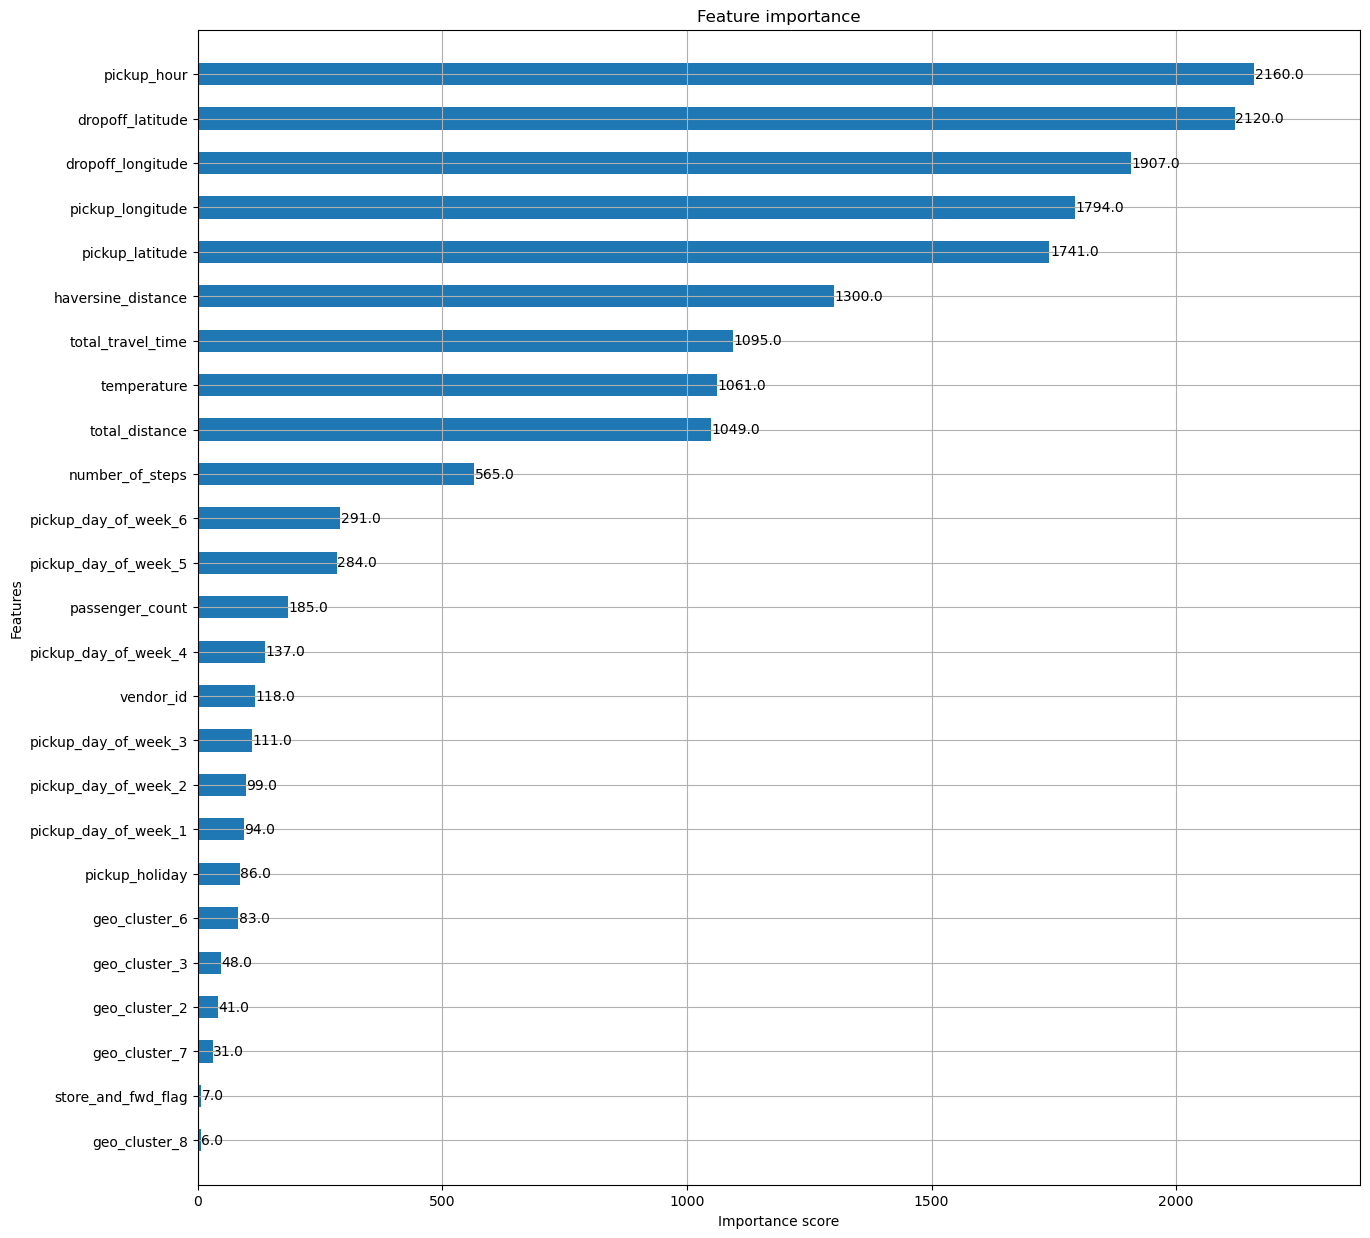

In [117]:
fig, ax = plt.subplots(figsize = (15,15))
xgb.plot_importance(model, ax = ax, height=0.5)

Были протестированы различные конфигурации модели XGBoost, включая изменение глубины деревьев, скорости обучения и параметров регуляризации. Несмотря на незначительное улучшение метрики RMSLE (~0.001) на валидационной выборке, данные изменения приводили к переобучению модели и не давали устойчивого прироста качества. В связи с этим была выбрана более консервативная конфигурация модели, обеспечивающая лучшую обобщающую способность.

Various XGBoost model configurations were tested, including changes to tree depth, learning rate, and regularization parameters. Despite a slight improvement in the RMSLE metric (~0.001) on the validation set, these changes resulted in overfitting the model and did not provide a sustainable improvement in performance. Therefore, a more conservative model configuration, which provided better generalization, was selected.